<a href="https://colab.research.google.com/github/CHAMS1110/NLP/blob/main/21SF03328_CHAMS_EDDINE_LOUHMADI(NLP_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training & testing

1. importing  libraries

In [1]:
#install torchnlp in order to load the dataset
!pip install torchnlp

     |████████████████████████████████| 5.4 MB 24.4 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 45 kB 3.8 MB/s 
     |████████████████████████████████| 591.8 MB 633 bytes/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.0
    Uninstalling tqdm-4.64.0:
      Successfully uninstalled tqdm-4.64.0
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.12.0
    Uninstalling torchtext-0.12.0:
      Successfully uninstalled torchtext-0.12.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. Th

In [2]:
#used lebraries during the data loading and data pre-processing
import os
import glob
import torch
import torch.nn as nn
import pandas as pd
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F
from torchnlp import *

2. Data Collection

In [3]:
# this function download the dataset that we will use it on this application, and devide it into training and testing directory, 
def imdb_dataset(directory='data/',
                 train=False,
                 test=False,
                 train_directory='train',
                 test_directory='test',extracted_name='aclImdb',
                 check_files=['aclImdb/README'],
                 url='http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz',
                 sentiments=['pos', 'neg']):
                 download_file_maybe_extract(url=url, directory=directory, check_files=check_files)
                 x= []
                 splits = [
                 dir_ for (requested, dir_) in [(train, train_directory), (test, test_directory)]
                 if requested
                 ]
                 for split_directory in splits:
                  full_path = os.path.join(directory, extracted_name, split_directory)
                  examples = []
                 for sentiment in sentiments:
                  for filename in glob.iglob(os.path.join(full_path, sentiment, '*.txt')):
                    with open(filename, 'r', encoding="utf-8") as f:
                      textnew = f.readline()
                      examples.append({
                      'text': textnew ,
                      'sentiment': sentiment,})
                      list.append(examples)
                 if len(x) == 1:
                  return x[0]
                 else:
                  return tuple(x)

3. Code Implementation using Keras Library

In [4]:
#used machine learnining libreries
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [5]:
#the maximum words that use on training is 5000
maximum_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=maximum_words)

17473536/17464789 [==============================] - 0s 0us/step


In [12]:
#the maximum reviews or comment that we use on training is 500
max_review = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review)
X_test = sequence.pad_sequences(X_test, maxlen=max_review)
embedding_vector_length = 32
model = Sequential()
model.add(Embedding( maximum_words, embedding_vector_length, input_length = max_review))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_2 (LSTM)               (None, 100)               53200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
!pip install plot_keras_history

     |████████████████████████████████| 323 kB 26.3 MB/s 
  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.36-py3-none-any.whl size=9236 sha256=c38bb8f5a579ea136eacca28fa9bef3b97610c72e6c6c20e1379c48fc5eb6987
  Stored in directory: /root/.cache/pip/wheels/ca/73/ed/41022b42c1d9ce60a8a2ebb71f042c7f895673760404d39fd7
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.37-py3-none-any.whl size=322417 sha256=fd1779e88a24dfbc5e95f27b7674c4eddab7649432088fe381519ab578415b09
  Stored in directory: /root/.cache/pip/wheels/0c/78/94/e86b788d7355576044865917a12917f95aaf6e79bcbec931e7
  Created wheel for compress-json: filename=compress_json-1.0.7-py3-none-any.whl size=5233 sha256=819754ec66a7bd85478df5be59bacf9b57c7c6d888d9e907545d019a2587689e
  Stored in directory: /root/.cache/pip/wheels/6d/7e/13/0e370d719528969d430498ca952417324595d116776840b279
Successfully built plot-keras-history sanitize-ml-labels compress-json


Epoch 1/50
391/391 [==============================] - 208s 530ms/step - loss: 0.4572 - accuracy: 0.7877
Epoch 2/50
391/391 [==============================] - 208s 532ms/step - loss: 0.2875 - accuracy: 0.8848
Epoch 3/50
391/391 [==============================] - 209s 534ms/step - loss: 0.2340 - accuracy: 0.9084
Epoch 4/50
391/391 [==============================] - 208s 531ms/step - loss: 0.2025 - accuracy: 0.9216
Epoch 5/50
391/391 [==============================] - 208s 532ms/step - loss: 0.1800 - accuracy: 0.9314
Epoch 6/50
391/391 [==============================] - 210s 538ms/step - loss: 0.1595 - accuracy: 0.9405
Epoch 7/50
391/391 [==============================] - 209s 534ms/step - loss: 0.1374 - accuracy: 0.9499
Epoch 8/50
391/391 [==============================] - 208s 531ms/step - loss: 0.1540 - accuracy: 0.9413
Epoch 9/50
391/391 [==============================] - 207s 528ms/step - loss: 0.1806 - accuracy: 0.9326
Epoch 10/50
391/391 [==============================] - 208s 533m

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f38419e2ad0>,
       dtype=object))

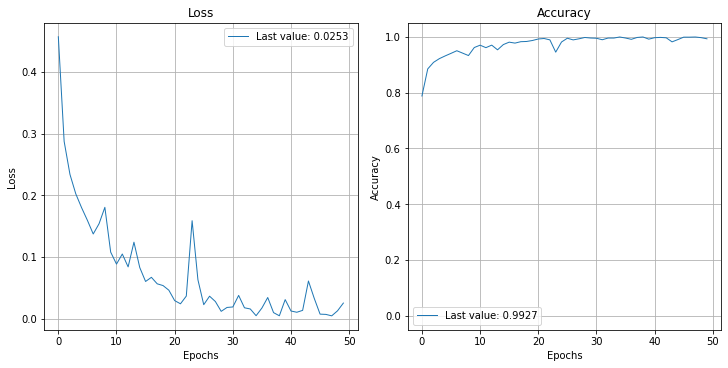

In [14]:
from matplotlib import pyplot
from plot_keras_history import plot_history
import keras
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=50, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Model accuracy on the IMDb dataset: {0:.2f}%".format(scores[1]*100))
plot_history(history)

In [15]:
print(X_test)
print(len(X_test))

[[   0    0    0 ...   14    6  717]
 [   0    0    0 ...  125    4 3077]
 [  33    6   58 ...    9   57  975]
 ...
 [   0    0    0 ...   21  846    2]
 [   0    0    0 ... 2302    7  470]
 [   0    0    0 ...   34 2005 2643]]
25000


In [16]:
#predict value
final_result = model.predict(X_test)

In [19]:
#set a sentimental function POS <0.5 NEG >0.5
positive = 0 
negative = 0 
neutral  = 0
for i in range(len(final_result)):
  if final_result[i] > 0.555555: 
    positive = positive + 1
  elif final_result[i] < 0.555555:
    negative = negative + 1
  else :
    neutral = neutral + 1
print('positive comment:',positive)
print()
print('negative comment:',negative)
print()
print('neutral comment:',neutral)

positive comment: 12447

negative comment: 12553

neutral comment: 0


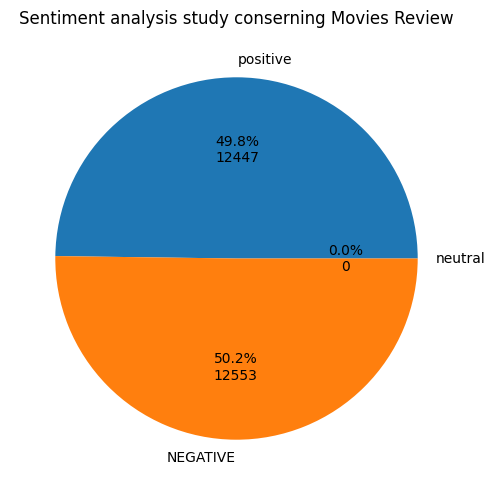

In [20]:
#show the result as graph
from matplotlib import pyplot as plt
import numpy as np
sentiment = ['positive','NEGATIVE','neutral']
data=[positive, negative, neutral]

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n{:d}".format(pct, absolute)

fig = plt.figure(figsize=(6,6), dpi=100)
plt.pie(data, labels= sentiment, autopct = lambda pct: func(pct, data) )
plt.title("Sentiment analysis study conserning Movies Review")
plt.show()

# Tweeter sentiment analysis study

1. install libraries and features

In [275]:
!pip install transformers

2. Download data from Twitter

In [276]:
!pip install snscrape

In [277]:
#important features
import snscrape.modules.twitter as sntwitter
import pandas as pd
import progressbar
from time import sleep
from datetime import datetime
import os
#choose a keyword
movie_dict = {'Emmanuel Macron': ['Emmanuel Macron since:2022-01-01 until:2022-04-23', 500]}

In [278]:
#build a filter
today = datetime.today().strftime('%Y%m%d')[2:]+'_'
for index, movie_name in enumerate(movie_dict):
    print(movie_name, '%')
    tweets_list1 = []
    bar = progressbar.ProgressBar(maxval=movie_dict[movie_name][1]+2, widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    bar.start()
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{movie_dict[movie_name][0]}').get_items()): 
      #declare a username
        bar.update(i+1)
        if i>movie_dict[movie_name][1]: 
          #number of tweets you want to scrape
            break
        #print(movie_name, i, tweet)
        tweets_list1.append([tweet.date, tweet.id, tweet.content, tweet.username]) 
        #declare the attributes to be returned
    tweets_df1 = pd.DataFrame(tweets_list1, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

    tweets_df1[['Datetime', 'Text']].to_csv(f'{index}.csv')
    bar.finish()

[                                                                        ] N/A%

Emmanuel Macron %


[========================================================================] 100%


3. Pre-process the data

In [279]:
#save the comments in csv files
import pandas as pd

#when importing empty rows, they are transformed to nan, so we need to drop them here
df = pd.read_csv('/content/0.csv')[['Text']]
df

,Text
0,@franceinter @EmmanuelMacron Excellent !!
1,@KarsentyHelene @DIVIZIO1 @ZemmourEric @leJDD ...
2,@GDarmanin @EmmanuelMacron T’as de la chance t...
3,Encore une fake news d'Emmanuel Macron. Dimanc...
4,@EmmanuelMacron Monsieur Macron allez-vous fai...
...,...
496,@LulaOficial @ricardostuckert @EmmanuelMacron ...
497,@EmmanuelMacron Le Pen .. mandou bem!!\nhttps:...
498,"Às vésperas das eleições francesas, pesquisas ..."
499,@AntiSceptick @manuelvalls @EmmanuelMacron htt...


In [280]:

#get rid of links and hashtags
df["Text"] = df["Text"].apply(lambda x : ' '.join([s for s in x.split(' ') if s.find('@') == -1 and s.find('www') == -1 and s.find('https') == -1]))
#get rid of non-ascii characters
df = df.replace(r'\W+', ' ', regex=True)
df

,Text
0,Excellent
1,Et tes enfants mûrissent vers quelle philosophie
2,T as de la chance tout seul Moussa Tu finiras ...
3,Encore une fake news d Emmanuel Macron Dimanch...
4,Monsieur Macron allez vous faire quelque chose...
...,...
496,Você sempre foi vagabundo você cortou o dedo p...
497,Le Pen mandou
498,Às vésperas das eleições francesas pesquisas m...
499,


In [281]:
#convert the csv file on to a list[]
example=df['Text'].values.tolist()
for i in range( len(example)):
  example[i-1]= example[i-1].lower()
#print(example)

In [282]:
#build a word counter
from collections import Counter

all_text2 = ' '.join(example)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)
print(count_words)

Counter({'de': 297, 'la': 212, 'macron': 188, 'a': 175, 'le': 155, 'est': 134, 'emmanuel': 131, 'et': 116, 'the': 108, 'à': 107, 'vous': 103, 'l': 100, 'of': 96, 'and': 94, 'un': 91, 'in': 91, 'are': 87, 'les': 86, 'ukraine': 86, 'pas': 85, 'en': 82, 'this': 82, 'que': 81, 'french': 80, 'about': 79, 'president': 79, 'social': 76, 'media': 76, 'week': 76, 'here': 76, 'users': 75, 'shared': 75, 'range': 75, 'false': 75, 'claims': 75, 'flooding': 75, 'australia': 75, 'facts': 75, 'pour': 74, 'c': 74, 'd': 73, 'on': 73, 'il': 72, 'des': 65, 'ne': 52, 'qui': 50, 'une': 45, 'france': 44, 'n': 42, 'du': 38, 'ça': 38, 'je': 38, 'au': 37, 'pen': 37, 'si': 36, 'ce': 34, 's': 32, 'plus': 32, 'qu': 31, 'se': 31, 'par': 30, 'is': 29, 'mais': 29, 'marine': 27, 'nous': 27, 'faire': 26, 'dans': 26, 'to': 26, 'avec': 25, 'tout': 23, 'sont': 23, 't': 21, 'fait': 20, 'non': 20, 'va': 20, 'sur': 19, 'comme': 19, 'quand': 19, 'bien': 19, 'notre': 18, 'y': 18, 'ils': 18, 'lui': 17, 'même': 17, 'encore': 16,

In [283]:
#index each word
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
print(vocab_to_int)

{'de': 1, 'la': 2, 'macron': 3, 'a': 4, 'le': 5, 'est': 6, 'emmanuel': 7, 'et': 8, 'the': 9, 'à': 10, 'vous': 11, 'l': 12, 'of': 13, 'and': 14, 'un': 15, 'in': 16, 'are': 17, 'les': 18, 'ukraine': 19, 'pas': 20, 'en': 21, 'this': 22, 'que': 23, 'french': 24, 'about': 25, 'president': 26, 'social': 27, 'media': 28, 'week': 29, 'here': 30, 'users': 31, 'shared': 32, 'range': 33, 'false': 34, 'claims': 35, 'flooding': 36, 'australia': 37, 'facts': 38, 'pour': 39, 'c': 40, 'd': 41, 'on': 42, 'il': 43, 'des': 44, 'ne': 45, 'qui': 46, 'une': 47, 'france': 48, 'n': 49, 'du': 50, 'ça': 51, 'je': 52, 'au': 53, 'pen': 54, 'si': 55, 'ce': 56, 's': 57, 'plus': 58, 'qu': 59, 'se': 60, 'par': 61, 'is': 62, 'mais': 63, 'marine': 64, 'nous': 65, 'faire': 66, 'dans': 67, 'to': 68, 'avec': 69, 'tout': 70, 'sont': 71, 't': 72, 'fait': 73, 'non': 74, 'va': 75, 'sur': 76, 'comme': 77, 'quand': 78, 'bien': 79, 'notre': 80, 'y': 81, 'ils': 82, 'lui': 83, 'même': 84, 'encore': 85, 'aussi': 86, 'ou': 87, 'for'

In [284]:
#Tokenize the words on each sentence
Tokenize_the_words = []
for sentence in example :
  r = [vocab_to_int[w] for w in sentence.split()]
  Tokenize_the_words.append(r)
print (Tokenize_the_words[0:500])

[[803], [8, 435, 804, 805, 232, 293, 806], [72, 105, 1, 2, 436, 70, 233, 807, 90, 808, 136, 90, 809, 41, 91], [85, 47, 810, 234, 41, 7, 3, 98, 92, 3, 5, 811, 136, 2, 812, 1, 64], [166, 3, 137, 11, 66, 813, 294, 39, 2, 437], [814], [815, 438, 56, 46, 6, 439, 40, 6, 23, 11, 49, 106, 20, 15, 816, 1, 80, 817], [5, 295, 818, 4, 440, 1, 154, 819, 76, 441, 12, 820, 442, 4, 167, 41, 91, 86, 821, 8, 822, 23, 43, 57, 6, 73, 823, 76, 18, 824, 443, 443, 43, 93, 23, 99, 825, 10, 92, 12, 199, 826, 77, 70, 5, 112], [444, 1, 445, 827], [828, 829, 446, 447, 448, 94], [], [235, 1, 2, 48, 57, 43, 830, 5, 449, 53, 831, 1, 450, 10, 12, 168, 95, 12, 832, 451, 235, 57, 43, 452, 12, 833, 87, 12, 834, 10, 835, 836, 1, 48, 56, 46, 6, 67, 5, 453, 1, 12, 168, 69, 18, 837, 451, 86], [107, 454], [7, 3, 838, 296, 138, 236, 121, 64, 5, 54, 839, 1, 840, 841, 842, 843, 455, 456, 457, 844, 845, 1, 297, 200, 846, 847, 138, 848, 849, 850, 458, 122, 851], [852, 853], [854, 855, 459, 1, 56, 856], [11, 857, 100, 10, 2, 858, 

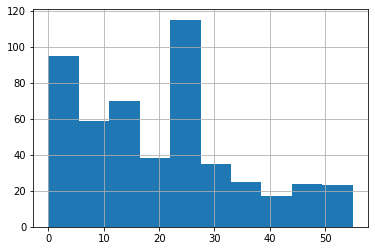

count    501.000000
mean      20.065868
std       14.462007
min        0.000000
25%        8.000000
50%       20.000000
75%       27.000000
max       55.000000
dtype: float64

In [285]:
#Analyze Reviews Length
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

comment_len = [len(x) for x in Tokenize_the_words]
pd.Series(comment_len).hist()
plt.show()
pd.Series(comment_len).describe()

In [286]:
#Padding / Truncating the remaining data
import numpy as np
def pad_features(Tokenize_the_words, seq_length):
    ''' Return features of Tokenize_the_words, where each review is padded with 0's or truncated to the input seq_length.'''
    features = np.zeros((len(Tokenize_the_words), seq_length), dtype = int)
    
    for i, sentence in enumerate(Tokenize_the_words):
        sentence_len = len(sentence)
        
        if sentence_len <= seq_length:
            zeroes = list(np.zeros(seq_length-sentence_len))
            new = zeroes+sentence        
        elif sentence_len > seq_length:
            new = sentence[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [287]:

pad_features(Tokenize_the_words, 500)

array([[   0,    0,    0, ...,    0,    0,  803],
       [   0,    0,    0, ...,  232,  293,  806],
       [   0,    0,    0, ...,  809,   41,   91],
       ...,
       [   0,    0,    0, ..., 2764,    1, 2765],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ..., 2770, 2771, 2772]])

In [288]:
tensor = pad_features(Tokenize_the_words, 500)
final_result = model.predict(tensor)

In [289]:
positive = 0 
negative = 0 
neutral = 0
for i in range(len(final_result)):
  if final_result[i] > 0.55555555: 
    positive = positive + 1
  elif final_result[i] < 0.55555555:
    negative = negative + 1
  else :
    neutral = neutral + 1
print('positive comment:',positive)
print()
print('negative comment:',negative)
print()
print('neutral comment:',neutral)

positive comment: 330

negative comment: 171

neutral comment: 0


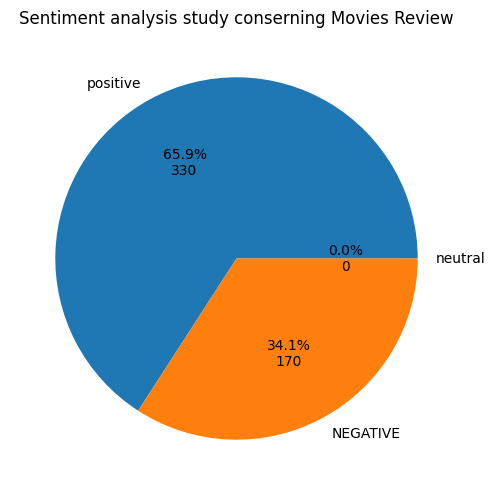

In [290]:
from matplotlib import pyplot as plt
import numpy as np
sentiment = ['positive','NEGATIVE','neutral']
data=[positive, negative, neutral]

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n{:d}".format(pct, absolute)

fig = plt.figure(figsize=(6,6), dpi=100)
plt.pie(data, labels= sentiment, autopct = lambda pct: func(pct, data) )
plt.title("Sentiment analysis study conserning Movies Review")
plt.show()

# Real test

In [30]:
wordst = ["Robert DeNiro plays the most unbelievably intelligent illiterate of all time. This movie is so wasteful of talent, it is truly disgusting.The script is unbelievable. The dialog is unbelievable. Jane Fonda's character is a caricature of herself, and not a funny one. The movie moves at a snail's pace, is photographed in an ill-advised manner, and is insufferably preachy. It also plugs in every cliche in the book. Swoozie Kurtz is excellent in a supporting role, but so what?<br /><br />Equally annoying is this new IMDB rule of requiring ten lines for every review. When a movie is this worthless, it doesn't require ten lines of text to let other readers know that it is a waste of time and tape. Avoid this movie.",'you are so stupid on this game']

In [31]:
from collections import Counter

all_text2 = ' '.join(wordst)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)


In [32]:
total_words = len(words)
sorted_words = count_words.most_common(total_words)
print(count_words)

Counter({'is': 11, 'of': 6, 'a': 6, 'in': 4, 'this': 4, 'movie': 3, 'so': 3, 'it': 3, 'and': 3, 'the': 2, 'unbelievable.': 2, 'The': 2, 'every': 2, 'ten': 2, 'lines': 2, 'Robert': 1, 'DeNiro': 1, 'plays': 1, 'most': 1, 'unbelievably': 1, 'intelligent': 1, 'illiterate': 1, 'all': 1, 'time.': 1, 'This': 1, 'wasteful': 1, 'talent,': 1, 'truly': 1, 'disgusting.The': 1, 'script': 1, 'dialog': 1, 'Jane': 1, "Fonda's": 1, 'character': 1, 'caricature': 1, 'herself,': 1, 'not': 1, 'funny': 1, 'one.': 1, 'moves': 1, 'at': 1, "snail's": 1, 'pace,': 1, 'photographed': 1, 'an': 1, 'ill-advised': 1, 'manner,': 1, 'insufferably': 1, 'preachy.': 1, 'It': 1, 'also': 1, 'plugs': 1, 'cliche': 1, 'book.': 1, 'Swoozie': 1, 'Kurtz': 1, 'excellent': 1, 'supporting': 1, 'role,': 1, 'but': 1, 'what?<br': 1, '/><br': 1, '/>Equally': 1, 'annoying': 1, 'new': 1, 'IMDB': 1, 'rule': 1, 'requiring': 1, 'for': 1, 'review.': 1, 'When': 1, 'worthless,': 1, "doesn't": 1, 'require': 1, 'text': 1, 'to': 1, 'let': 1, 'othe

In [33]:

vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
print(vocab_to_int)

{'is': 1, 'of': 2, 'a': 3, 'in': 4, 'this': 5, 'movie': 6, 'so': 7, 'it': 8, 'and': 9, 'the': 10, 'unbelievable.': 11, 'The': 12, 'every': 13, 'ten': 14, 'lines': 15, 'Robert': 16, 'DeNiro': 17, 'plays': 18, 'most': 19, 'unbelievably': 20, 'intelligent': 21, 'illiterate': 22, 'all': 23, 'time.': 24, 'This': 25, 'wasteful': 26, 'talent,': 27, 'truly': 28, 'disgusting.The': 29, 'script': 30, 'dialog': 31, 'Jane': 32, "Fonda's": 33, 'character': 34, 'caricature': 35, 'herself,': 36, 'not': 37, 'funny': 38, 'one.': 39, 'moves': 40, 'at': 41, "snail's": 42, 'pace,': 43, 'photographed': 44, 'an': 45, 'ill-advised': 46, 'manner,': 47, 'insufferably': 48, 'preachy.': 49, 'It': 50, 'also': 51, 'plugs': 52, 'cliche': 53, 'book.': 54, 'Swoozie': 55, 'Kurtz': 56, 'excellent': 57, 'supporting': 58, 'role,': 59, 'but': 60, 'what?<br': 61, '/><br': 62, '/>Equally': 63, 'annoying': 64, 'new': 65, 'IMDB': 66, 'rule': 67, 'requiring': 68, 'for': 69, 'review.': 70, 'When': 71, 'worthless,': 72, "doesn't"

In [34]:
Tokenize_the_words = []
for sentence in wordst :
  r = [vocab_to_int[w] for w in sentence.split()]
  Tokenize_the_words.append(r)
print (Tokenize_the_words[0:2])

[[16, 17, 18, 10, 19, 20, 21, 22, 2, 23, 24, 25, 6, 1, 7, 26, 2, 27, 8, 1, 28, 29, 30, 1, 11, 12, 31, 1, 11, 32, 33, 34, 1, 3, 35, 2, 36, 9, 37, 3, 38, 39, 12, 6, 40, 41, 3, 42, 43, 1, 44, 4, 45, 46, 47, 9, 1, 48, 49, 50, 51, 52, 4, 13, 53, 4, 10, 54, 55, 56, 1, 57, 4, 3, 58, 59, 60, 7, 61, 62, 63, 64, 1, 5, 65, 66, 67, 2, 68, 14, 15, 69, 13, 70, 71, 3, 6, 1, 5, 72, 8, 73, 74, 14, 15, 2, 75, 76, 77, 78, 79, 80, 81, 8, 1, 3, 82, 2, 83, 9, 84, 85, 5, 86], [87, 88, 7, 89, 90, 5, 91]]


In [35]:
import numpy as np
def pad_features(Tokenize_the_words, seq_length):
    ''' Return features of Tokenize_the_words, where each review is padded with 0's or truncated to the input seq_length.'''
    features = np.zeros((len(Tokenize_the_words), seq_length), dtype = int)
    
    for i, sentence in enumerate(Tokenize_the_words):
        sentence_len = len(sentence)
        
        if sentence_len <= seq_length:
            zeroes = list(np.zeros(seq_length-sentence_len))
            new = zeroes+sentence        
        elif sentence_len > seq_length:
            new = sentence[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [36]:
tensor = pad_features(Tokenize_the_words, 500)
final_result = model.predict(tensor)
print(final_result)

[[0.938721 ]
 [0.9999716]]


In [37]:
positive = 0 
negative = 0 
neutral = 0
for i in range(len(final_result)):
  if final_result[i] > 0.5: 
    positive = positive + 1
  elif final_result[i] < 0.5:
    negative = negative + 1
  else :
    neutral = neutral + 1
print('positive comment:',positive)
print()
print('negative comment:',negative)
print()
print('neutral comment:',neutral)

positive comment: 2

negative comment: 0

neutral comment: 0


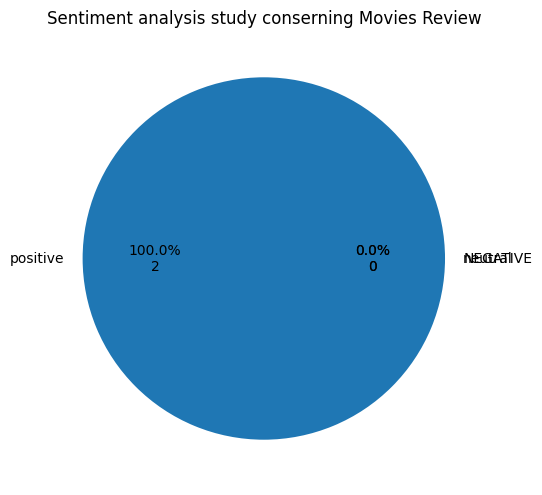

In [38]:
from matplotlib import pyplot as plt
import numpy as np
sentiment = ['positive','NEGATIVE','neutral']
data=[positive, negative, neutral]

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n{:d}".format(pct, absolute)

fig = plt.figure(figsize=(6,6), dpi=100)
plt.pie(data, labels= sentiment, autopct = lambda pct: func(pct, data) )
plt.title("Sentiment analysis study conserning Movies Review")
plt.show()

3. Perform sentiment analysis

# Sentimental study on 2022 Elective study

the goal of this study is to predict the next president of France of the election of 2022 based on 1000 tweeter reviews about the topic twitter ,
there are mainly 12 candidats which are:

*   Nathalie Arthaud 
*   Nicolas Dupont-Aignan
*   Anne Hidalgo
*   Yannick Jadot
*   Jean Lassalle
*   Marine Le Pen
*   Emmanuel Macron
*   Jean-Luc Mélenchon
*   Valérie Pécresse
*   Philippe Poutou
*   Fabien Roussel
*   Eric Zemmour


[                                                                        ] N/A%

bitcoin %


[========================================================================] 100%


positive comment: 325

negative comment: 176

neutral comment: 0


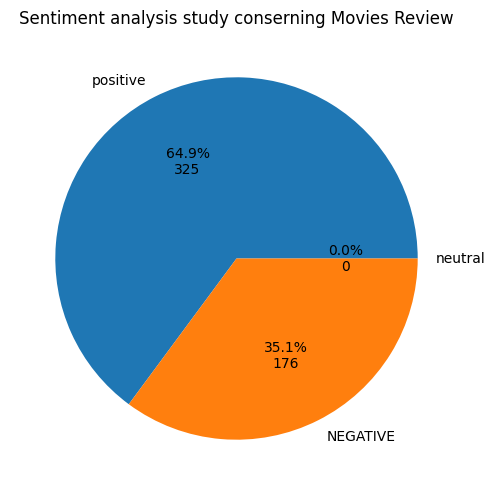

In [203]:
candidats = ['Nathalie Arthaud','Nicolas Dupont-Aignan','Anne Hidalgo','Yannick Jadot','Jean Lassalle','Marine Le Pen','Emmanuel Macron'
,'Jean-Luc Mélenchon','Valérie Pécresse','Philippe Poutou','Fabien Roussel','Eric Zemmour']

#important features
import snscrape.modules.twitter as sntwitter
import pandas as pd
import progressbar
from time import sleep
from datetime import datetime
import os
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
#choose a keyword
movie_dict = {'bitcoin': ['bitcoin since:2022-01-01 until:2022-04-23', 500]}


#build a filter
today = datetime.today().strftime('%Y%m%d')[2:]+'_'
for index, movie_name in enumerate(movie_dict):
    print(movie_name, '%')
    tweets_list1 = []
    bar = progressbar.ProgressBar(maxval=movie_dict[movie_name][1]+2, widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    bar.start()
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{movie_dict[movie_name][0]}').get_items()): 
      #declare a username
        bar.update(i+1)
        if i>movie_dict[movie_name][1]: 
          #number of tweets you want to scrape
            break
        #print(movie_name, i, tweet)
        tweets_list1.append([tweet.date, tweet.id, tweet.content, tweet.username]) 
        #declare the attributes to be returned
    tweets_df1 = pd.DataFrame(tweets_list1, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

    tweets_df1[['Datetime', 'Text']].to_csv(f'{index}.csv')
    bar.finish()
    #save the comments in csv files

#when importing empty rows, they are transformed to nan, so we need to drop them here
df = pd.read_csv('/content/0.csv')[['Text']]
#df


#get rid of links and hashtags
df["Text"] = df["Text"].apply(lambda x : ' '.join([s for s in x.split(' ') if s.find('@') == -1 and s.find('www') == -1 and s.find('https') == -1]))
#get rid of non-ascii characters
df = df.replace(r'\W+', ' ', regex=True)
#df

#convert the csv file on to a list[]
example=df['Text'].values.tolist()
for i in range( len(example)):
  example[i-1]= example[i-1].lower()
#print(example)

#build a word counter

all_text2 = ' '.join(example)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)
#print(count_words)

#index each word
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
#print(vocab_to_int)

#Tokenize the words on each sentence
Tokenize_the_words = []
for sentence in example :
  r = [vocab_to_int[w] for w in sentence.split()]
  Tokenize_the_words.append(r)
#print (Tokenize_the_words[0:500])
#Padding / Truncating the remaining data

def pad_features(Tokenize_the_words, seq_length):
    ''' Return features of Tokenize_the_words, where each review is padded with 0's or truncated to the input seq_length.'''
    features = np.zeros((len(Tokenize_the_words), seq_length), dtype = int)
    
    for i, sentence in enumerate(Tokenize_the_words):
        sentence_len = len(sentence)
        
        if sentence_len <= seq_length:
            zeroes = list(np.zeros(seq_length-sentence_len))
            new = zeroes+sentence        
        elif sentence_len > seq_length:
            new = sentence[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

tensor = pad_features(Tokenize_the_words, 500)
final_result = model.predict(tensor)

positive = 0 
negative = 0 
neutral = 0
for i in range(len(final_result)):
  if final_result[i] < 0.55555555: 
    positive = positive + 1
  elif final_result[i] > 0.55555555:
    negative = negative + 1
  else :
    neutral = neutral + 1
print('positive comment:',positive)
print()
print('negative comment:',negative)
print()
print('neutral comment:',neutral)

sentiment = ['positive','NEGATIVE','neutral']
data=[positive, negative, neutral]

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n{:d}".format(pct, absolute)

fig = plt.figure(figsize=(6,6), dpi=100)
plt.pie(data, labels= sentiment, autopct = lambda pct: func(pct, data) )
plt.title("Sentiment analysis study conserning Movies Review")
plt.show()